In [46]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [47]:
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

In [27]:
def sundec(day):
    return np.arcsin(np.sin(23.5/180*math.pi)*np.sin(day/365.25*2*math.pi))

def sundecdeg(day):
    return 180/math.pi*sundec(day)

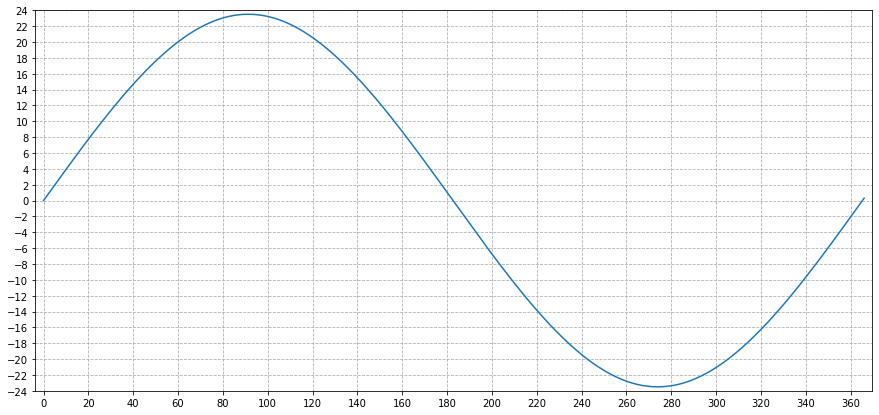

In [28]:
#Declination curve for (unit) spherical sundial
x = np.linspace(0, 366, 500)
fig = plt.figure(figsize=(15,7))
ax = fig.gca()
plt.plot(x,sundecdeg(x))
plt.margins(.01,.1)
#ax.set_xlim([-1,3])
ax.set_ylim([-1,10])
ax.set_xticks(np.arange(0, 365, 20))
ax.set_yticks(np.arange(-24, 25, 2))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('scaphe.pdf',bbox_inches='tight')
plt.show()

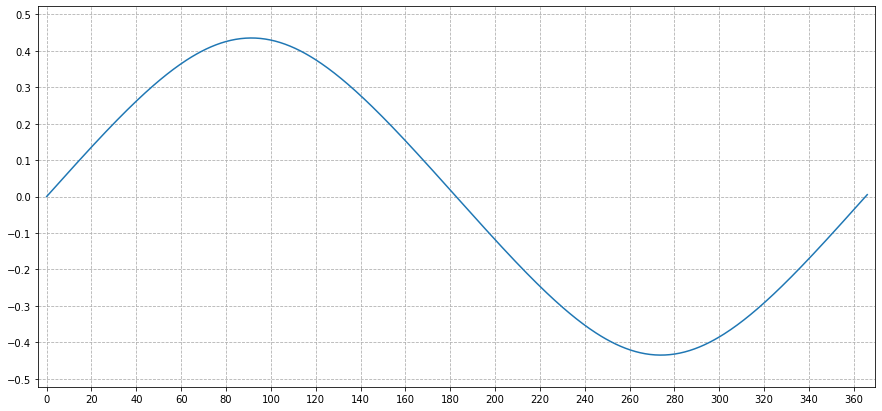

In [35]:
#Declination curve for polar sundial with (unit) cylindrical surface (gnomon at the centre)
x = np.linspace(0, 366, 500)
fig = plt.figure(figsize=(15,7))
ax = fig.gca()
plt.plot(x,np.tan(sundec(x)))
plt.margins(.01,.1)
#ax.set_xlim([-1,3])
#ax.set_ylim([-1,10])
ax.set_xticks(np.arange(0, 365, 20))
ax.set_yticks(np.arange(-0.5, 0.55, .1))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('sundecflat.pdf',bbox_inches='tight')
plt.show()

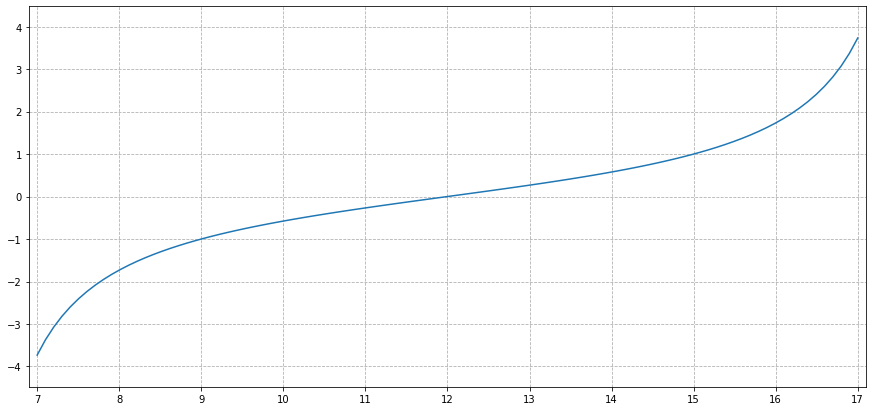

In [42]:
#Hour curve for polar sundial with flat surface (gnomon at unit distance)
x = np.linspace(7, 17, 100)
fig = plt.figure(figsize=(15,7))
ax = fig.gca()
plt.plot(x,np.tan((x-12)*math.pi/12))
plt.margins(.01,.1)
#ax.set_xlim([-1,3])
#ax.set_ylim([-1,10])
ax.set_xticks(np.arange(7, 17.1, 1))
#ax.set_yticks(np.arange(-0.4, 0.5, .1))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('sunhourflat.pdf',bbox_inches='tight')
plt.show()

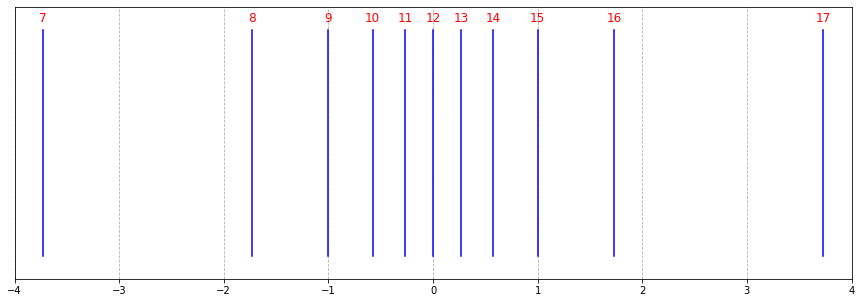

In [77]:
#Hour marks for polar sundial with flat surface (gnomon at unit distance)
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
d = .05
for i in range(7,18):
    x = np.tan((i-12)*math.pi/12)
    plt.plot([x,x],[0,1],'b')
    plt.text(x, 1+d, i, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
plt.margins(.01,.1)
#ax.set_xlim([-1,3])
ax.set_ylim([-0.1,1.1])
ax.set_xticks(np.arange(-4, 4.1, 1))
#ax.set_yticks(np.arange(-0.4, 0.5, .1))
ax.set_yticks([])
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('sunhourflat.pdf',bbox_inches='tight')
plt.show()

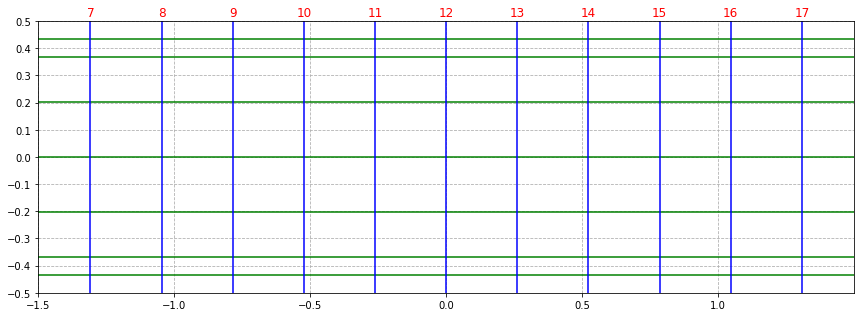

In [143]:
#Seasonal and hourly marks for polar sundial with (unit) cylindrical surface (gnomon at the centre)
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
d = .03
for i in range(-3,4):
    y = np.tan(sundec(i*365.5/12))
    plt.plot([-1.5,1.5],[y,y],'g')
for i in range(7,18):
    x = (i-12)*math.pi/12
    plt.plot([x,x],[-.5,.5],'b')
    plt.text(x, .5+d, i, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
plt.margins(.01,.1)
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-0.5,0.5])
ax.set_xticks(np.arange(-1.5, 1.1, .5))
ax.set_yticks(np.arange(-0.5, 0.51, .1))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
ax.set_aspect(1)
#plt.legend(loc=2)
#plt.savefig('sunhourflat.pdf',bbox_inches='tight')
plt.show()

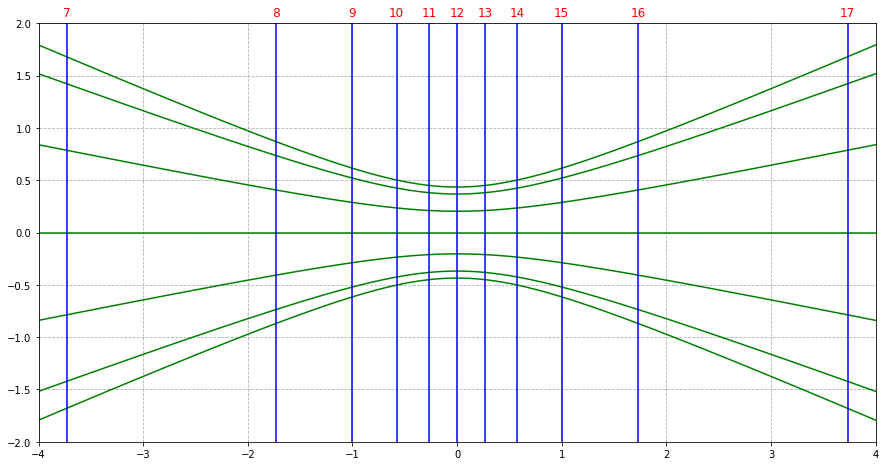

In [145]:
#Seasonal and hourly marks for polar sundial with flat surface (gnomon at unit distance)
def sdpolar(x):
    return np.sqrt(x*x+1)*np.tan(delta)
    
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
d = .1
x = np.linspace(-4, 4, 100)
for i in range(-3,4):
    delta = sundec(i*365.5/12)
    plt.plot(x,sdpolar(x),'g')
for i in range(7,18):
    x = np.tan((i-12)*math.pi/12)
    plt.plot([x,x],[-2,2],'b')
    plt.text(x, 2+d, i, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
plt.margins(.01,.1)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xticks(np.arange(-4, 4.1, 1))
ax.set_yticks(np.arange(-2, 2.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
ax.set_aspect(1)
#plt.legend(loc=2)
#plt.savefig('sunhourflat.pdf',bbox_inches='tight')
plt.show()

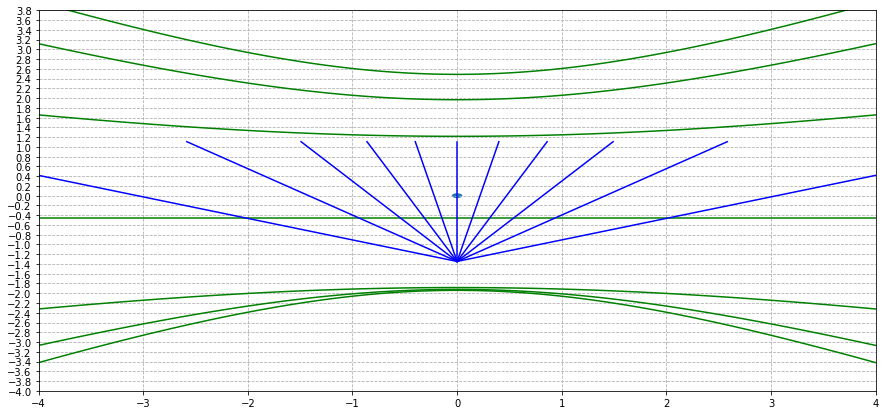

In [142]:
#Seasonal and hourly marks for horizontal sundial (gnomon at unit height at the origin)
def sdhoriz(x):
    td=np.tan(delta)
    t2d=td*td
    a = ct2a-t2d
    c = x*x*t2d-cs2a
    d = a*c+b2*b2
    z = (np.sqrt(d)*np.sign(td)+b2)/a
    return z*csa-cc

fig = plt.figure(figsize=(15,7))
ax = fig.gca()
d = .03
lat = 47.8864
h = np.tan(lat*math.pi/180)
h0 = 1/np.sin(lat*math.pi/180)
r = 1/np.cos(lat*math.pi/180)

cta=1/h
ct2a=cta*cta
csa=h0
cs2a=csa*csa
b2=ct2a*cs2a
cc=cta+csa*r

x = np.linspace(-4, 4, 100)
for i in range(-3,4):
    delta = sundec(i*365.5/12)
    plt.plot(x,sdhoriz(x),'g')

for i in range(7,18):
    x = r*np.tan((i-12)*math.pi/12)
    plt.plot([0,x],[-h0,h],'b')
#    plt.text(x, .5+d, i, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
cc = plt.Circle((0,0),.05)
ax.add_artist(cc)

plt.margins(.01,.1)
ax.set_xlim([-4,4])
ax.set_ylim([-h0,h])
ax.set_xticks(np.arange(-4, 4.1, 1))
ax.set_yticks(np.arange(-4, 4, .2))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('sunhourflat.pdf',bbox_inches='tight')
plt.show()

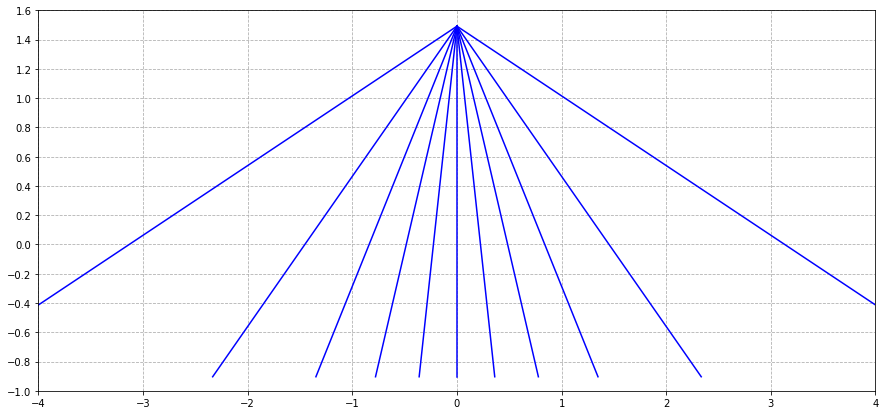

In [97]:
fig = plt.figure(figsize=(15,7))
ax = fig.gca()
d = .03
lat = 47.8864
colat = 90-lat
h = np.tan(colat*math.pi/180)
h0 = 1/np.sin(colat*math.pi/180)
r = 1/np.cos(colat*math.pi/180)

#for i in range(-3,4):
#    y = np.tan(sundec(i*365.5/12))
#    plt.plot([-4,4],[y,y],'g')

for i in range(7,18):
    x = r*np.tan((i-12)*math.pi/12)
    plt.plot([0,x],[h0,-h],'b')
#    plt.text(x, .5+d, i, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
plt.margins(.01,.1)
ax.set_xlim([-4,4])
ax.set_ylim([-h,h0])
ax.set_xticks(np.arange(-4, 4.1, 1))
ax.set_yticks(np.arange(-1, 1.7, .2))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('sunhourflat.pdf',bbox_inches='tight')
plt.show()